In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d jangedoo/utkface-new

 94% 313M/331M [00:20<00:01, 14.2MB/s]
100% 331M/331M [00:20<00:00, 16.9MB/s]


In [ ]:
import zipfile
zip = zipfile.ZipFile("/content/utkface-new.zip",'r')
zip.extractall("/content")
zip.close()

In [ ]:
import os
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
folder_path = '/content/utkface_aligned_cropped/UTKFace'

In [ ]:
age=[]
gender=[]
img_path=[]
for file in os.listdir(folder_path):
  age.append(int(file.split('_')[0]))
  gender.append(int(file.split('_')[1]))
  img_path.append(file)

In [ ]:
len(age)

23708

In [ ]:
df = pd.DataFrame({'age':age,'gender':gender,'img':img_path})

In [ ]:
df.shape

(23708, 3)

In [ ]:
df.head()

,age,gender,img
0,1,1,1_1_3_20161219224454728.jpg.chip.jpg
1,35,0,35_0_3_20170119201122781.jpg.chip.jpg
2,35,0,35_0_0_20170117120747082.jpg.chip.jpg
3,30,0,30_0_0_20170119180216577.jpg.chip.jpg
4,30,1,30_1_2_20170104022925822.jpg.chip.jpg


In [ ]:
train_df = df.sample(frac=1,random_state=0).iloc[:20000]
test_df = df.sample(frac=1,random_state=0).iloc[20000:]

In [ ]:
train_df.shape

(20000, 3)

In [ ]:
test_df.shape

(3708, 3)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    directory=folder_path,
                                                    x_col='img',
                                                    y_col=['age','gender'],
                                                    target_size=(200,200),
                                                    class_mode='multi_output')

test_generator = test_datagen.flow_from_dataframe(test_df,
                                                    directory=folder_path,
                                                    x_col='img',
                                                    y_col=['age','gender'],
                                                    target_size=(200,200),
                                                  class_mode='multi_output')

Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras.models import Model

In [ ]:
resnet = ResNet50(include_top=False, input_shape=(200,200,3))

In [ ]:
resnet = ResNet50(include_top=False, input_shape=(200,200,3))

resnet.trainable=False

output = resnet.layers[-1].output

flatten = Flatten()(output)

dense1 = Dense(512, activation='relu')(flatten)
dense2 = Dense(512,activation='relu')(flatten)

dense3 = Dense(512,activation='relu')(dense1)
dense4 = Dense(512,activation='relu')(dense2)

output1 = Dense(1,activation='linear',name='age')(dense3)
output2 = Dense(1,activation='sigmoid',name='gender')(dense4)

In [ ]:
model = Model(inputs=resnet.input,outputs=[output1,output2])

In [ ]:
model.compile(optimizer='adam', loss={'age': 'mae', 'gender': 'binary_crossentropy'}, metrics={'age': 'mae', 'gender': 'accuracy'},loss_weights={'age':1,'gender':99})

In [ ]:
model.fit(train_generator, batch_size=32, epochs=10, validation_data=test_generator)

Epoch 1/10
625/625 [==============================] - 192s 308ms/step - loss: 99.9177 - age_loss: 15.4168 - gender_loss: 0.8535 - age_mae: 15.4168 - gender_accuracy: 0.5128 - val_loss: 83.2029 - val_age_loss: 14.7048 - val_gender_loss: 0.6919 - val_age_mae: 14.7048 - val_gender_accuracy: 0.5251
Epoch 2/10
625/625 [==============================] - 189s 302ms/step - loss: 83.7399 - age_loss: 15.1015 - gender_loss: 0.6933 - age_mae: 15.1015 - gender_accuracy: 0.5214 - val_loss: 144.5108 - val_age_loss: 14.6180 - val_gender_loss: 1.3120 - val_age_mae: 14.6180 - val_gender_accuracy: 0.5251
Epoch 3/10
625/625 [==============================] - 187s 299ms/step - loss: 84.2922 - age_loss: 14.9594 - gender_loss: 0.7003 - age_mae: 14.9594 - gender_accuracy: 0.5206 - val_loss: 83.4230 - val_age_loss: 14.9192 - val_gender_loss: 0.6920 - val_age_mae: 14.9192 - val_gender_accuracy: 0.5251
Epoch 4/10
625/625 [==============================] - 185s 296ms/step - loss: 83.5334 - age_loss: 14.8921 - gen

**Functional API model for RNN **

In [ ]:
from keras.layers import *
from keras.models import Model

In [ ]:
# define two sets of inputs
inputA = Input(shape=(32,))
inputB = Input(shape=(128,))

In [ ]:
# the first branch operates on the first input
x = Dense(8, activation="relu")(inputA)
x1 = Dense(4, activation="relu")(x)

In [ ]:
# the second branch opreates on the second input
y = Dense(64, activation="relu")(inputB)
y1 = Dense(32, activation="relu")(y)
y2 = Dense(4, activation="relu")(y1)

In [ ]:
# combine the output of the two branches
combined = concatenate([x1, y2])

In [ ]:
# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(2, activation="relu")(combined)
z1 = Dense(1, activation="linear")(z)

In [ ]:
# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[inputA, inputB], outputs=z1)

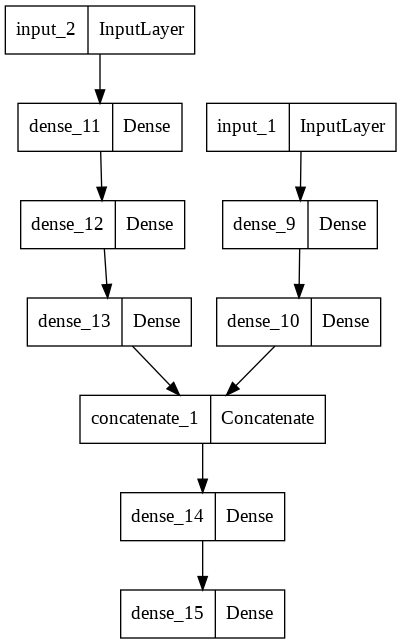

In [ ]:
from keras.utils import plot_model
plot_model(model)

**Functional api Demo using RNN model**

In [ ]:
from keras.models import Model

In [ ]:
model = Model(inputs = x ,outputs = [output1,output2])

In [ ]:
from keras.layers import *

In [ ]:
x = Input(shape=(3,))

In [ ]:
hidden1 = Dense(128,activation='relu')(x)
hidden2 = Dense(64,activation='relu')(hidden1)

output1 = Dense(1,activation='linear')(hidden2)
output2 = Dense(1,activation='sigmoid')(hidden2)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          512         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           8256        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 1)            65          ['dense_1[0][0]']                
                                                                                              

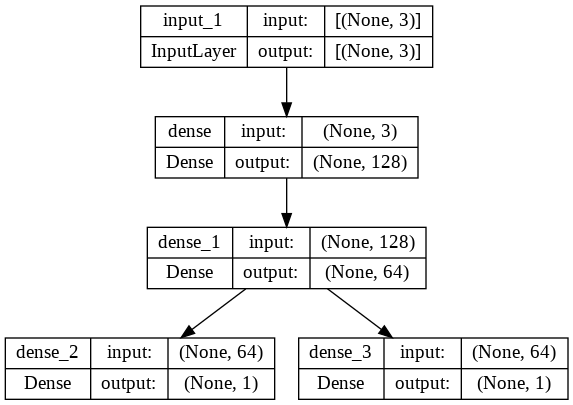

In [ ]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)